In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsOneClassifier

from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA


In [2]:
individuos = os.path.join("df_*.csv")
individuos = glob.glob(individuos)
df = pd.concat(map(pd.read_csv, individuos), ignore_index=True)

df.describe(include='all')

,N_AF3,N_F7,N_F3,N_FC5,N_T7,N_P7,N_O1,N_O2,N_P8,N_T8,...,N_F8,N_AF4,MED_CAN,STD_EEG,MAX_EST,STD_LATERAL,STD_ANTERO,MED_LATERAL,MED_ANTERO,TARGET
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.247762,1.339822,1.694888,2.238020,5.080919,2.626229,1.527952,0.917325,0.908047,1.335137,...,1.065799,1.261262,15.401075,1.479974,18.077126,3.354506,5.637786,-0.164245,-0.144731,0.280000
std,0.445908,0.635084,0.631904,1.412539,7.581480,1.495458,1.458308,0.639064,0.601175,1.046027,...,0.495354,0.781351,26.833607,1.811628,9.848991,2.508139,2.297447,0.129161,0.099787,0.453557
min,0.348741,0.367423,0.468227,0.721225,0.300352,0.426943,0.135549,0.184213,0.235648,0.438928,...,0.506461,0.535768,1.846111,0.281358,5.176000,0.543043,1.971174,-0.659404,-0.466434,0.000000
25%,0.983253,0.916247,1.332055,1.429685,1.803944,1.453852,0.449582,0.462905,0.568209,0.702709,...,0.725045,0.777421,3.053230,0.665739,11.490000,1.828674,4.112370,-0.206945,-0.176669,0.000000
50%,1.256265,1.204011,1.497080,1.874604,2.487622,2.360337,0.966141,0.798856,0.778352,0.997945,...,0.899734,0.943705,4.351711,0.965910,16.651000,2.723055,5.396568,-0.146267,-0.123638,0.000000
75%,1.472077,1.698665,1.861597,2.651444,3.841120,3.362757,2.149529,1.085055,1.006626,1.407565,...,1.363624,1.554083,14.612945,1.359707,20.730000,3.909688,6.402853,-0.073956,-0.081348,1.000000
max,2.269306,3.720099,3.359667,9.020582,35.282868,6.598567,6.363069,3.003820,3.659552,5.805613,...,2.507713,4.998127,119.538371,8.775754,58.049000,15.038919,13.967989,0.152334,0.028539,1.000000


In [3]:
df.to_csv('df_1.csv', index=False)
files.download('df_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y = df.iloc[:,21]

x = df.iloc[:,0:21]

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_train

array([[0.95200563, 0.8270709 , 0.48918031, 0.35108377, 0.08771711,
        0.22726583, 1.        , 0.45536178, 0.0122989 , 0.00915428,
        0.01281759, 0.13091673, 0.99094148, 0.06127885, 0.03925459,
        0.10832892, 0.17420104, 0.22323287, 0.24924267, 0.57735607,
        0.77577053],
       [0.66501685, 1.        , 0.94878609, 0.83105543, 0.09097567,
        0.41682986, 0.        , 0.24179091, 0.27693936, 0.24047066,
        0.16815517, 0.15856276, 0.38121385, 0.11513422, 0.01332519,
        0.09021725, 0.1084569 , 0.01929706, 0.1368353 , 0.65811609,
        0.79931648],
       [0.07057064, 0.05340442, 0.        , 0.25643348, 0.04253286,
        0.28375457, 0.70433728, 1.        , 0.95230372, 0.17843962,
        0.07875741, 0.18494591, 0.8706326 , 0.00853489, 0.01561969,
        0.07469658, 0.17437235, 0.2228116 , 0.24979606, 0.61559256,
        0.69873642],
       [0.45155405, 0.37937615, 0.39582283, 0.        , 0.00325044,
        0.27508025, 0.14517629, 0.29770301, 0.3511899

([<matplotlib.axis.XTick at 0x7faddce25c10>,
 <a list of 19 Text major ticklabel objects>)

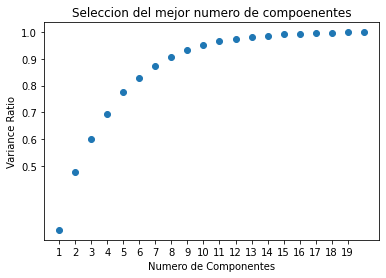

In [ ]:
ratio =[]
componentes = []
for n in range(1,21):
    pca = decomposition.PCA(n_components=n,whiten=True,svd_solver='arpack',random_state=0)
    pca.fit(x_train)
    suma = sum(pca.explained_variance_ratio_)
    
    ratio.append(suma)
    componentes.append(n)

plt.figure()
plt.title("Seleccion del mejor numero de compoenentes")
plt.xlabel('Numero de Componentes')
plt.ylabel('Variance Ratio')
plt.scatter(componentes, ratio)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
plt.xticks(range(1,20))


##Metodos de clasificacion

###Arbol de decision

In [ ]:

i=[5,10,15,20,30]
for k in i:
    arbol = DecisionTreeClassifier(max_depth=k)
    arbol.fit(x_train, y_train)

    y_test_predicted_arbol = arbol.predict(x_test)

    
    MCC = matthews_corrcoef(y_test, y_test_predicted_arbol)
    ACC = accuracy_score(y_test, y_test_predicted_arbol)
    
    print("profundidad máxima =",k)
    print("Accuracy", ACC)

profundidad máxima = 5
Accuracy 0.38461538461538464
profundidad máxima = 10
Accuracy 0.38461538461538464
profundidad máxima = 15
Accuracy 0.6153846153846154
profundidad máxima = 20
Accuracy 0.6153846153846154
profundidad máxima = 30
Accuracy 0.38461538461538464


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [ ]:

arbol = RandomForestClassifier(max_depth = k)
arbol.fit(x_train, y_train)

    
y_test_predicted_2 = arbol.predict(x_test)

MCC = matthews_corrcoef(y_test, y_test_predicted_2)
print("matthews_corrcoef", MCC)

ACC = accuracy_score(y_test, y_test_predicted_2)
print("Accuracy", ACC)

F1 = f1_score(y_test, y_test_predicted_2, average='micro')
print("F1", F1)

matthews_corrcoef 0.0
Accuracy 0.38461538461538464
F1 0.38461538461538464


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


###Regresion logistica

In [ ]:
clf = LogisticRegression(random_state=0,solver = 'liblinear',tol=0.00001,multi_class='ovr',max_iter=100)
clf.fit(x_train,y_train)


LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear',
                   tol=1e-05)

In [ ]:
print("A la entrada x= \n",x_train[[2,36,36], :]," \nLa salida:  \n",clf.predict(x_train[[2,36,36], :]),"\n")
print("El vector de hipotesis de X es: ", clf.predict_proba(x_train[[2,36,36], :]),"\n")
print("accuracy: ",clf.score(x_train, y_train))# mean accuracy on the given test data and labels

A la entrada x= 
 [[0.07057064 0.05340442 0.         0.25643348 0.04253286 0.28375457
  0.70433728 1.         0.95230372 0.17843962 0.07875741 0.18494591
  0.8706326  0.00853489 0.01561969 0.07469658 0.17437235 0.2228116
  0.24979606 0.61559256 0.69873642]
 [0.58017783 0.41705948 0.31232791 0.50584619 0.05514234 0.08654987
  0.06289145 0.22086247 0.39169491 0.10464678 0.10130052 0.
  0.40451828 0.12231588 0.01635823 0.02725275 0.0459105  0.17943433
  0.09499363 0.76937347 0.86210331]
 [0.58017783 0.41705948 0.31232791 0.50584619 0.05514234 0.08654987
  0.06289145 0.22086247 0.39169491 0.10464678 0.10130052 0.
  0.40451828 0.12231588 0.01635823 0.02725275 0.0459105  0.17943433
  0.09499363 0.76937347 0.86210331]]  
La salida:  
 [0 0 0] 

El vector de hipotesis de X es:  [[0.92302831 0.07697169]
 [0.87243779 0.12756221]
 [0.87243779 0.12756221]] 

accuracy:  0.8918918918918919


In [ ]:
prob=clf.predict_proba(x_train[[2,36,36], :])
print(prob)
type(prob)
print(prob.shape)
probtotal=np.sum(prob,axis=1)
print(probtotal)


[[0.92302831 0.07697169]
 [0.87243779 0.12756221]
 [0.87243779 0.12756221]]
(3, 2)
[1. 1. 1.]


In [ ]:
ovo=OneVsOneClassifier(LogisticRegression(random_state=0))
ovo.fit(x_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(random_state=0))

In [ ]:
print("A la entrada x= \n",x_train[[2,36,36], :]," \nLa salida:  \n",ovo.predict(x_train[[2,36,36], :]),"\n")
#print("El vector de hipotesis de X es: ", ovo.predict_proba(X[[4,50,120], :]),"\n")
print("accuracy: ",ovo.score(x_train, y_train))# mean accuracy on the given test data and labels

MCC = matthews_corrcoef(y_test, y_test_predicted_2)
print("matthews_corrcoef", MCC)

A la entrada x= 
 [[0.07057064 0.05340442 0.         0.25643348 0.04253286 0.28375457
  0.70433728 1.         0.95230372 0.17843962 0.07875741 0.18494591
  0.8706326  0.00853489 0.01561969 0.07469658 0.17437235 0.2228116
  0.24979606 0.61559256 0.69873642]
 [0.58017783 0.41705948 0.31232791 0.50584619 0.05514234 0.08654987
  0.06289145 0.22086247 0.39169491 0.10464678 0.10130052 0.
  0.40451828 0.12231588 0.01635823 0.02725275 0.0459105  0.17943433
  0.09499363 0.76937347 0.86210331]
 [0.58017783 0.41705948 0.31232791 0.50584619 0.05514234 0.08654987
  0.06289145 0.22086247 0.39169491 0.10464678 0.10130052 0.
  0.40451828 0.12231588 0.01635823 0.02725275 0.0459105  0.17943433
  0.09499363 0.76937347 0.86210331]]  
La salida:  
 [0 0 0] 

accuracy:  0.918918918918919
matthews_corrcoef 0.0
